# Power Spectra calculation and plot
## This Notebook uses two approaches to calculate the power spectra:
### 1. Creates a 3D density grid and calculates the mean zeroed density, which is then put into the powerbox function 'get_power' to calculate the Power Spectrum of Galaxies and HI Mass.*


### 2. The galaxy positions are put into the power box function 'get_power' directly, calculating the PS.

### *NOTE: The HI Mass PS is the same as the Galaxy power spectra, but the 3D density grid is weighted by the HI Mass

### This is repeated for Galaxy Power spectra (positions only), HI Mass Power Spectra (positions weighted by HI Mass) and Centrals (Type of galaxy is central, so we are looking at haloes) and satellites.

In [1]:
# Power Spectrum plot
import matplotlib.pyplot as plt
import numpy as np
import powerbox as pbox
from Functions import *
from mpl_toolkits import mplot3d
from powerbox import get_power
from scipy import stats
import statistics
import pandas as pd

# Redshift = 0 
snapshot_used = 250 # z = 0
gals, sim_props, snaplist = get_gal_catalogue(snapshot_used)
gals1, sim_props, snaplist = get_gal_catalogue(snapshot_used)

# See other available Snaps and Redshifts
reds = snaplist[1]
snaps = snaplist[0]

snaplist_index_used = list(snaplist[0]).index(snapshot_used)# convert to list and find the index of the snap we are using
redshift_used = snaplist[1][snaplist_index_used] # Get the redshift for corresponding snapshot
redshift_used = str(round(redshift_used, 1)) # round float to nearest whole int
gals.columns #returns all avaiable properties of galxies

Index(['HaloID', 'ID', 'Type', 'CentralGal', 'GhostFlag', 'Len', 'MaxLen',
       'Spin', 'Mvir', 'Rvir', 'Vvir', 'Vmax', 'FOFMvir', 'HotGas',
       'MetalsHotGas', 'ColdGas', 'MetalsColdGas', 'H2Frac', 'H2Mass',
       'HIMass', 'Mcool', 'DiskScaleLength', 'StellarMass', 'GrossStellarMass',
       'MetalsStellarMass', 'Sfr', 'EjectedGas', 'MetalsEjectedGas',
       'BlackHoleMass', 'Rcool', 'Cos_Inc', 'MergTime', 'MergerStartRadius',
       'BaryonFracModifier', 'FOFMvirModifier', 'MvirCrit', 'MergerBurstMass',
       'MWMSA', 'Fesc', 'FescWeightedGSM', 'FescBH', 'BHemissivity',
       'EffectiveBHM', 'BlackHoleAccretedHotMass', 'BlackHoleAccretedColdMass',
       'dt', 'Pos_0', 'Pos_1', 'Pos_2', 'Vel_0', 'Vel_1', 'Vel_2',
       'NewStars_0', 'NewStars_1', 'NewStars_2', 'NewStars_3', 'NewStars_4'],
      dtype='object')

In [2]:
gals1 = gals1[gals1.HIMass != 0]# remove all HIMass = 0 rows from gals 
HIMass = gals1["HIMass"]*1e10#convert into correct units

# Create 3D Position arrays

In [3]:
# NORMAL GALAXY POSITIONS for GAL and MVIR array (no 0 values found in gals for MVir)
pos_x = gals["Pos_0"]
pos_y = gals["Pos_1"]
pos_z = gals["Pos_2"]
Pos = np.array([pos_x, pos_y, pos_z])
Pos_new=Pos.T # Transpose the Pos so it is in format (N,D) array
# HI GALAXY POSITIONS
pos_x1 = gals1["Pos_0"]
pos_y1 = gals1["Pos_1"]
pos_z1 = gals1["Pos_2"]
Pos1 = np.array([pos_x1, pos_y1, pos_z1])
Pos_new1=Pos1.T # Transpose the Pos so it is in format (N,D) array
Pos_new1.shape

(1640350, 3)

# Variables for power spectra

In [4]:
# getting bits ready for 3D grid 
boxsize = 178.57142857142858 # get the box size, this is from sims pops 
dim = len(Pos) # number of dimensions in 3D space =3
boxlength = [boxsize] * dim #get box length for each side of box
N = pos_x.shape # = 1648367
V = np.product(boxlength)
nbins=179 # define the number of bins for our 3D grid

# Get 3D GRID and calculate PS
## HI Mass and Galaxies only

In [5]:
# Get 3D density grids
rhox, edges = np.histogramdd(Pos_new, bins=nbins)  # calculate the 3D grid using histogramdd
rhohimass, edgeshimass = np.histogramdd(Pos_new1, bins=nbins, weights=HIMass)  # calculate the 3D grid using histogramdd
# Get overdensity
delta = rhox / np.mean(rhox) - 1 
deltahimass = rhohimass / np.mean(rhohimass) - 1 
# get power spectrum
gal_ps, gal_k = get_power(delta,boxlength,remove_shotnoise=False)
himass_ps, himass_k = get_power(deltahimass,boxlength,remove_shotnoise=False)

0.2874053303562353


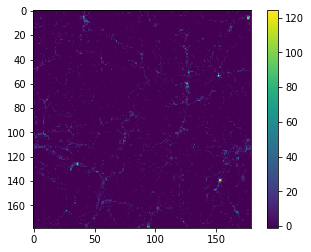

In [6]:
plt.imshow(delta[:,:,0])
plt.colorbar()
print(np.mean(rhox))

# Calculate PS with Positions
## HI Mass and Galaxies only

In [7]:
# N sets the number of k values (we want to go up to 10)
N_input = 300
gal_ps1, gal_k1 = pbox.get_power(Pos_new,boxlength,bins=100,N=N_input,remove_shotnoise=False)# NO WEIGHTS for GALAXY PS
himass_ps1, himass_k1 = pbox.get_power(Pos_new1,boxlength,bins=100,N=N_input,remove_shotnoise=False, weights=HIMass)# NO WEIGHTS for GALAXY PS
gal_ps1_SN, gal_k1_SN = pbox.get_power(Pos_new,boxlength,bins=100,N=N_input,remove_shotnoise=True)# NO WEIGHTS for GALAXY PS
himass_ps1_SN, himass_k1_SN = pbox.get_power(Pos_new1,boxlength,bins=100,N=N_input,remove_shotnoise=True, weights=HIMass)# NO WEIGHTS for GALAXY PS

## Calculate the Shot noise
### SN = PS - PS (shot noise removed)

In [8]:
# GALAXY
gal1_SN = gal_ps1 - gal_ps1_SN
print('gal1_SN',gal1_SN)
# HI MASS
HIMass1_SN = himass_ps1 - himass_ps1_SN
HIMass1_SN
print('HIMass1_SN',HIMass1_SN)

gal1_SN [3.45447463 3.45447463 3.45447463 3.45447463 3.45447463 3.45447463
 3.45447463 3.45447463 3.45447463 3.45447463 3.45447463 3.45447463
 3.45447463 3.45447463 3.45447463 3.45447463 3.45447463 3.45447463
 3.45447463 3.45447463 3.45447463 3.45447463 3.45447463 3.45447463
 3.45447463 3.45447463 3.45447463 3.45447463 3.45447463 3.45447463
 3.45447463 3.45447463 3.45447463 3.45447463 3.45447463 3.45447463
 3.45447463 3.45447463 3.45447463 3.45447463 3.45447463 3.45447463
 3.45447463 3.45447463 3.45447463 3.45447463 3.45447463 3.45447463
 3.45447463 3.45447463 3.45447463 3.45447463 3.45447463 3.45447463
 3.45447463 3.45447463 3.45447463 3.45447463 3.45447463 3.45447463
 3.45447463 3.45447463 3.45447463 3.45447463 3.45447463 3.45447463
 3.45447463 3.45447463 3.45447463 3.45447463 3.45447463 3.45447463
 3.45447463 3.45447463 3.45447463 3.45447463 3.45447463 3.45447463
 3.45447463 3.45447463 3.45447463 3.45447463 3.45447463 3.45447463
 3.45447463 3.45447463 3.45447463 3.45447463 3.4544746

### Plot just for 3D grid version

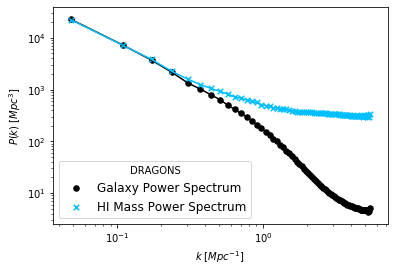

In [9]:
# plot PS
fig, ax = plt.subplots(1, 1)
label_z = ("z = " + redshift_used)
# Labels and Legends
label_galsPS = ("Galaxy Power Spectrum")
label_himassPS = ("HI Mass Power Spectrum")
label_mvirPS = ("Halo Mass Power Spectrum")
# Plot
ax.set_xlabel(r"$k$ $[Mpc^{-1}]$")
ax.set_ylabel(r"$P(k)$ $[Mpc^{3}]$")
plt.xscale('log')
plt.yscale('log')
ax.plot(gal_k,gal_ps,color="black")
ax.scatter(gal_k,gal_ps,color="black", label=label_galsPS, marker="o",s=30)
ax.plot(himass_k,himass_ps,color="deepskyblue")
ax.scatter(himass_k,himass_ps,color="deepskyblue", label=label_himassPS,marker="x",s=30)

plt.legend(title=("DRAGONS"),
           loc='lower left',
           fontsize=12)
# Name and save plot
nbins = str(nbins)
name_of_plot=("PowerSpectrum_GALS_and_HIMass_logged_TEST" + nbins)
plt.savefig("plots/PS/" + name_of_plot + ".pdf")

### Plot with 3D grid and Positions PS

No handles with labels found to put in legend.


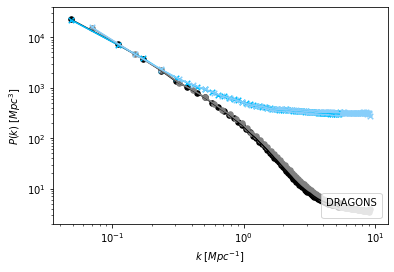

In [10]:
# plot PS
fig, ax = plt.subplots(1, 1)
label_z = ("z = " + redshift_used)
# Labels and Legends
label_galsPS = ("Galaxy Power Spectrum")
label_himassPS = ("HI Mass Power Spectrum")
label_mvirPS = ("Halo Mass Power Spectrum")
labelpowerbox = ("Positions")
labelhist = ("3D density grid")
# Plot
ax.set_xlabel(r"$k$ $[Mpc^{-1}]$")
ax.set_ylabel(r"$P(k)$ $[Mpc^{3}]$")
plt.xscale('log')
plt.yscale('log')
ax.plot(gal_k,gal_ps,color="black")
ax.scatter(gal_k,gal_ps,color="black", marker="o",s=30)
ax.plot(himass_k,himass_ps,color="deepskyblue")
ax.scatter(himass_k,himass_ps,color="deepskyblue",marker="x",s=30)

ax.plot(gal_k1,gal_ps1,color="grey")
ax.scatter(gal_k1,gal_ps1,color="grey", marker="o",s=30)
ax.plot(himass_k1,himass_ps1,color="lightskyblue")
ax.scatter(himass_k1,himass_ps1,color="lightskyblue",marker="x",s=30)

plt.legend(title=("DRAGONS"),
           loc='lower right',
           fontsize=12)
# Name and save plot
nbins = str(nbins)
name_of_plot=("PowerSpectrum_GALS_and_HIMass_logged_BOTH" + nbins)
plt.savefig("plots/PS/" + name_of_plot + ".pdf")

# ADD CENTRALS

In [11]:
# Add centrals
Type = gals["Type"]
Cen_gals = gals[Type==0]
nbins=179
Cen_pos_x, Cen_pos_y, Cen_pos_z, Cen_Pos, Cen_Pos_new = return_3d_pos(Cen_gals)
Cen_rhox, Cen_edges = np.histogramdd(Cen_Pos_new, bins=nbins)
Cen_delta = Cen_rhox / np.mean(Cen_rhox) - 1 # calcualte the over density
N_input = 300
Cen_gal_ps, Cen_gal_k = get_power(Cen_delta,boxlength,remove_shotnoise=False,weights=None)# NO WEIGHTS for GALAXY PS
Cen_gal_ps_pos, Cen_gal_k_pos = get_power(Cen_Pos_new,boxlength,bins=100,N=N_input,remove_shotnoise=False)# NO WEIGHTS for GALAXY PS


# ADD SATELLITES

In [12]:
# Add Satellites
Type = gals["Type"]
Sat_gals = gals[Type==1]
nbins=179
Sat_pos_x, Sat_pos_y, Sat_pos_z, Sat_Pos, Sat_Pos_new = return_3d_pos(Sat_gals)
Sat_rhox, Sat_edges = np.histogramdd(Sat_Pos_new, bins=nbins)
Sat_delta = Sat_rhox / np.mean(Sat_rhox) - 1 # calcualte the over density
N_input = 300
Sat_gal_ps, Sat_gal_k = get_power(Sat_delta,boxlength,remove_shotnoise=False,weights=None)# NO WEIGHTS for GALAXY PS
Sat_gal_ps_pos, Sat_gal_k_pos = get_power(Sat_Pos_new,boxlength,bins=100,N=N_input,remove_shotnoise=False)# NO WEIGHTS for GALAXY PS

## Plot with pos and 3D grid PS, with Galaxy PS, Centrals and Satellites and HI Mass PS

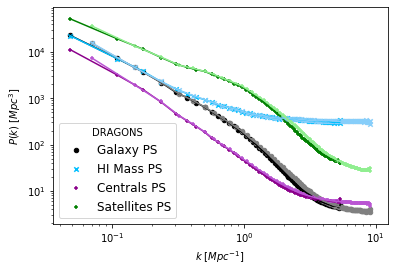

In [13]:
# plot PS
fig, ax = plt.subplots(1, 1)
label_z = ("z = " + redshift_used)
# HISTOGRAMS
label_galsPS = ("Galaxy PS")
label_himassPS = ("HI Mass PS")
label_Cen = ("Centrals PS")
label_Sat = ("Satellites PS")
# POSITIONS
label_galsPS_pos = ("Galaxy PS")
label_himassPS_pos = ("HI Mass PS")
label_Cen_pos = ("Centrals PS")
label_Sat_pos = ("Satellites PS")
# Plot
ax.set_xlabel(r"$k$ $[Mpc^{-1}]$")
ax.set_ylabel(r"$P(k)$ $[Mpc^{3}]$")
plt.xscale('log')
plt.yscale('log')

# From density grid
ax.plot(gal_k,gal_ps,color="black")
ax.scatter(gal_k,gal_ps,color="black", label=label_galsPS, marker="o",s=20)
ax.plot(himass_k,himass_ps,color="deepskyblue")
ax.scatter(himass_k,himass_ps,color="deepskyblue", label=label_himassPS,marker="x",s=20)
ax.plot(Cen_gal_k,Cen_gal_ps,color="darkmagenta")
ax.scatter(Cen_gal_k,Cen_gal_ps,color="darkmagenta", label=label_Cen, marker="+", s=20)
ax.plot(Sat_gal_k,Sat_gal_ps,color="green")
ax.scatter(Sat_gal_k,Sat_gal_ps,color="green", label=label_Sat, marker="+", s=20)

# from positions
ax.plot(gal_k1,gal_ps1,color="grey")
ax.scatter(gal_k1,gal_ps1,color="grey", marker="o",s=20)
ax.plot(himass_k1,himass_ps1,color="lightskyblue")
ax.scatter(himass_k1,himass_ps1,color="lightskyblue",marker="x",s=20)
ax.plot(Cen_gal_k_pos,Cen_gal_ps_pos,color="mediumorchid")
ax.scatter(Cen_gal_k_pos,Cen_gal_ps_pos,color="mediumorchid", marker="+", s=20)
ax.plot(Sat_gal_k_pos,Sat_gal_ps_pos,color="lightgreen")
ax.scatter(Sat_gal_k_pos,Sat_gal_ps_pos,color="lightgreen", marker="+", s=20)

plt.legend(title=("DRAGONS"),
           fontsize=12,
           loc="best")

# Name and save plot
nbins = str(nbins)
name_of_plot=("PowerSpectrum_GALS_and_HIMass_logged_BOTH_with_Cent_Sat" + nbins)
plt.savefig("plots/PS/" + name_of_plot + ".pdf")

# Calculate Shot Noise for Centrals and Satellites


In [14]:
Cen_gal_ps_pos_NOSN, Cen_gal_k_pos_NOSN = get_power(Cen_Pos_new,boxlength,bins=100,N=N_input,remove_shotnoise=True)# NO WEIGHTS for GALAXY PS
Sat_gal_ps_pos_NOSN, Sat_gal_k_pos_NOSN = get_power(Sat_Pos_new,boxlength,bins=100,N=N_input,remove_shotnoise=True)# NO WEIGHTS for GALAXY PS

Cen_SN = Cen_gal_ps_pos - Cen_gal_ps_pos_NOSN
Sat_SN = Sat_gal_ps_pos - Sat_gal_ps_pos_NOSN

In [15]:
Cen_SN

array([5.53028023, 5.53028023, 5.53028023, 5.53028023, 5.53028023,
       5.53028023, 5.53028023, 5.53028023, 5.53028023, 5.53028023,
       5.53028023, 5.53028023, 5.53028023, 5.53028023, 5.53028023,
       5.53028023, 5.53028023, 5.53028023, 5.53028023, 5.53028023,
       5.53028023, 5.53028023, 5.53028023, 5.53028023, 5.53028023,
       5.53028023, 5.53028023, 5.53028023, 5.53028023, 5.53028023,
       5.53028023, 5.53028023, 5.53028023, 5.53028023, 5.53028023,
       5.53028023, 5.53028023, 5.53028023, 5.53028023, 5.53028023,
       5.53028023, 5.53028023, 5.53028023, 5.53028023, 5.53028023,
       5.53028023, 5.53028023, 5.53028023, 5.53028023, 5.53028023,
       5.53028023, 5.53028023, 5.53028023, 5.53028023, 5.53028023,
       5.53028023, 5.53028023, 5.53028023, 5.53028023, 5.53028023,
       5.53028023, 5.53028023, 5.53028023, 5.53028023, 5.53028023,
       5.53028023, 5.53028023, 5.53028023, 5.53028023, 5.53028023,
       5.53028023, 5.53028023, 5.53028023, 5.53028023, 5.53028

In [16]:
Sat_SN

array([24.35612142, 24.35612142, 24.35612142, 24.35612142, 24.35612142,
       24.35612142, 24.35612142, 24.35612142, 24.35612142, 24.35612142,
       24.35612142, 24.35612142, 24.35612142, 24.35612142, 24.35612142,
       24.35612142, 24.35612142, 24.35612142, 24.35612142, 24.35612142,
       24.35612142, 24.35612142, 24.35612142, 24.35612142, 24.35612142,
       24.35612142, 24.35612142, 24.35612142, 24.35612142, 24.35612142,
       24.35612142, 24.35612142, 24.35612142, 24.35612142, 24.35612142,
       24.35612142, 24.35612142, 24.35612142, 24.35612142, 24.35612142,
       24.35612142, 24.35612142, 24.35612142, 24.35612142, 24.35612142,
       24.35612142, 24.35612142, 24.35612142, 24.35612142, 24.35612142,
       24.35612142, 24.35612142, 24.35612142, 24.35612142, 24.35612142,
       24.35612142, 24.35612142, 24.35612142, 24.35612142, 24.35612142,
       24.35612142, 24.35612142, 24.35612142, 24.35612142, 24.35612142,
       24.35612142, 24.35612142, 24.35612142, 24.35612142, 24.35

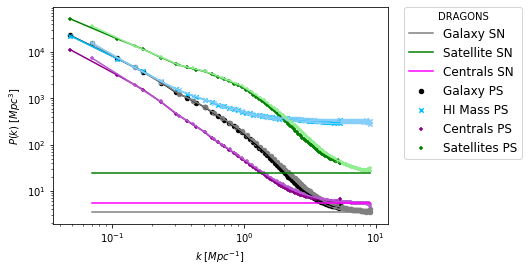

In [21]:
# plot PS
fig, ax = plt.subplots(1, 1)
label_z = ("z = " + redshift_used)
# HISTOGRAMS
label_galsPS = ("Galaxy PS")
label_himassPS = ("HI Mass PS")
label_Cen = ("Centrals PS")
label_Sat = ("Satellites PS")
# POSITIONS
label_galsPS_pos = ("Galaxy PS")
label_himassPS_pos = ("HI Mass PS")
label_Cen_pos = ("Centrals PS")
label_Sat_pos = ("Satellites PS")
label_Sat_SN = ("Satellite SN")
label_Cen_SN = ("Centrals SN")
label_gal_SN = ("Galaxy SN")
label_HIMass_SN = ("HIMass SN")
# Plot
ax.set_xlabel(r"$k$ $[Mpc^{-1}]$")
ax.set_ylabel(r"$P(k)$ $[Mpc^{3}]$")
plt.xscale('log')
plt.yscale('log')

# From density grid
ax.plot(gal_k,gal_ps,color="black")
ax.scatter(gal_k,gal_ps,color="black", label=label_galsPS, marker="o",s=20)
ax.plot(himass_k,himass_ps,color="deepskyblue")
ax.scatter(himass_k,himass_ps,color="deepskyblue", label=label_himassPS,marker="x",s=20)
ax.plot(Cen_gal_k,Cen_gal_ps,color="darkmagenta")
ax.scatter(Cen_gal_k,Cen_gal_ps,color="darkmagenta", label=label_Cen, marker="+", s=20)
ax.plot(Sat_gal_k,Sat_gal_ps,color="green")
ax.scatter(Sat_gal_k,Sat_gal_ps,color="green", label=label_Sat, marker="+", s=20)

# from positions
ax.plot(gal_k1,gal_ps1,color="grey")
ax.scatter(gal_k1,gal_ps1,color="grey", marker="o",s=20)
ax.plot(himass_k1,himass_ps1,color="lightskyblue")
ax.scatter(himass_k1,himass_ps1,color="lightskyblue",marker="x",s=20)
ax.plot(Cen_gal_k_pos,Cen_gal_ps_pos,color="mediumorchid")
ax.scatter(Cen_gal_k_pos,Cen_gal_ps_pos,color="mediumorchid", marker="+", s=20)
ax.plot(Sat_gal_k_pos,Sat_gal_ps_pos,color="lightgreen")
ax.scatter(Sat_gal_k_pos,Sat_gal_ps_pos,color="lightgreen", marker="+", s=20)

ax.plot(gal_k1,gal1_SN,color="gray", label=label_gal_SN)
#ax.plot(himass_k1,HIMass1_SN,color="deepskyblue", label=label_HIMass_SN)
ax.plot(Sat_gal_k_pos,Sat_SN,color="green", label=label_Sat_SN)
ax.plot(Cen_gal_k_pos,Cen_SN,color="magenta", label=label_Cen_SN)

plt.legend(title=("DRAGONS"),
           fontsize=12,
           bbox_to_anchor=(1.05, 1),
           loc='upper left', 
           borderaxespad=0.)

# Name and save plot
nbins = str(nbins)
name_of_plot=("PowerSpectrum_GALS_and_HIMass_logged_BOTH_with_Cent_Sat_WITHSN" + nbins)
plt.savefig("plots/PS/" + name_of_plot + ".pdf")

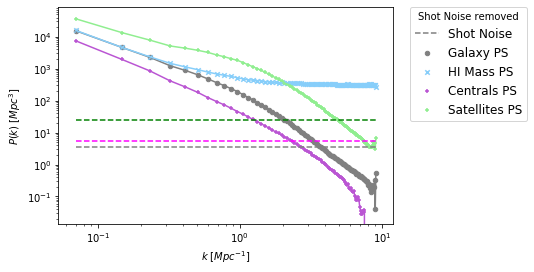

In [23]:
# plot PS
fig, ax = plt.subplots(1, 1)
label_z = ("z = " + redshift_used)
# HISTOGRAMS
label_galsPS = ("Galaxy PS")
label_himassPS = ("HI Mass PS")
label_Cen = ("Centrals PS")
label_Sat = ("Satellites PS")
# POSITIONS
label_galsPS_pos = ("Galaxy PS")
label_himassPS_pos = ("HI Mass PS")
label_Cen_pos = ("Centrals PS")
label_Sat_pos = ("Satellites PS")
label_shotnoise = ("Shot Noise")
#label_Sat_SN = ("Satellite SN")
#label_Cen_SN = ("Centrals SN")
#label_gal_SN = ("Galaxy SN")
#label_HIMass_SN = ("HIMass SN")
# Plot
ax.set_xlabel(r"$k$ $[Mpc^{-1}]$")
ax.set_ylabel(r"$P(k)$ $[Mpc^{3}]$")
plt.xscale('log')
plt.yscale('log')

# from positions
ax.plot(gal_k1_SN,gal_ps1_SN,color="grey")
ax.scatter(gal_k1_SN,gal_ps1_SN,color="grey", marker="o",s=20,label=label_galsPS_pos)
ax.plot(himass_k1_SN,himass_ps1_SN,color="lightskyblue")
ax.scatter(himass_k1_SN,himass_ps1_SN,color="lightskyblue",marker="x",s=20,label=label_himassPS)
ax.plot(Cen_gal_k_pos_NOSN,Cen_gal_ps_pos_NOSN,color="mediumorchid")
ax.scatter(Cen_gal_k_pos_NOSN,Cen_gal_ps_pos_NOSN,color="mediumorchid", marker="+", s=20,label=label_Cen)
ax.plot(Sat_gal_k_pos_NOSN,Sat_gal_ps_pos_NOSN,color="lightgreen")
ax.scatter(Sat_gal_k_pos_NOSN,Sat_gal_ps_pos_NOSN,color="lightgreen", marker="+", s=20,label=label_Sat)

ax.plot(gal_k1,gal1_SN,color="gray",label=label_shotnoise, linestyle='--')
#ax.plot(himass_k1,HIMass1_SN,color="deepskyblue", label=label_HIMass_SN)
ax.plot(Sat_gal_k_pos_NOSN,Sat_SN,color="green", linestyle='--')
ax.plot(Cen_gal_k_pos_NOSN,Cen_SN,color="magenta", linestyle='--')

plt.legend(title=("Shot Noise removed"),
           fontsize=12,
           bbox_to_anchor=(1.05, 1),
           loc='upper left', 
           borderaxespad=0.)

# Name and save plot
nbins = str(nbins)
name_of_plot=("PowerSpectrum_GALS_and_HIMass_logged_with_Cent_Sat_SN_LINE" + nbins)
plt.savefig("plots/PS/" + name_of_plot + ".pdf")

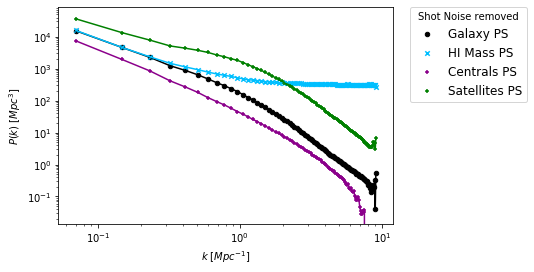

In [22]:
# plot PS
fig, ax = plt.subplots(1, 1)
label_z = ("z = " + redshift_used)
label_galsPS_pos = ("Galaxy PS")
label_himassPS_pos = ("HI Mass PS")
label_Cen_pos = ("Centrals PS")
# Plot
ax.set_xlabel(r"$k$ $[Mpc^{-1}]$")
ax.set_ylabel(r"$P(k)$ $[Mpc^{3}]$")
plt.xscale('log')
plt.yscale('log')

# from positions
ax.plot(gal_k1_SN,gal_ps1_SN,color="black")
ax.scatter(gal_k1_SN,gal_ps1_SN,color="black", marker="o",s=20,label=label_galsPS_pos)
ax.plot(himass_k1_SN,himass_ps1_SN,color="deepskyblue")
ax.scatter(himass_k1_SN,himass_ps1_SN,color="deepskyblue",marker="x",s=20,label=label_himassPS)
ax.plot(Cen_gal_k_pos_NOSN,Cen_gal_ps_pos_NOSN,color="darkmagenta")
ax.scatter(Cen_gal_k_pos_NOSN,Cen_gal_ps_pos_NOSN,color="darkmagenta", marker="+", s=20,label=label_Cen)
ax.plot(Sat_gal_k_pos_NOSN,Sat_gal_ps_pos_NOSN,color="green")
ax.scatter(Sat_gal_k_pos_NOSN,Sat_gal_ps_pos_NOSN,color="green", marker="+", s=20,label=label_Sat)

plt.legend(title=("Shot Noise removed"),
           fontsize=12,
           bbox_to_anchor=(1.05, 1),
           loc='upper left', 
           borderaxespad=0.)

# Name and save plot
nbins = str(nbins)
name_of_plot=("PowerSpectrum_GALS_and_HIMass_logged_with_Cent_Sat_SN_REMOVED" + nbins)
plt.savefig("plots/PS/" + name_of_plot + ".pdf")

# Calculate the HI Bias
$b_{HI}=\sqrt{\frac{(PS_{HI}(k)-P_{SN})}{P_m(k)}}$

## where 

$b_{HI}$

## is the HI Bias, 

$(PS_{HI}(k) - P_{SN})$

## is the shot noise subtracted HI Mass power spectrum and 

$P_m(k)$

## is the matter power spectrum.

In [27]:
bhi = (himass_k1_SN/gal_k1_SN)**0.5
bhi

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])